In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("titanic.csv")

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["cabin_null"]=np.where(df["Cabin"].isnull(),1,0)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [7]:
df.cabin_null.mean()

0.7710437710437711

In [8]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [13]:
g=df.groupby("Survived")
g.get_group(1).cabin_null.mean()

0.6023391812865497

In [14]:
df.groupby("Survived")["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [15]:
##


In [21]:
d=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [22]:
d

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [23]:
d.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [64]:
def nan_values(data,var,mode):
    data[var+"_median"]=data[var].fillna(mode)

In [65]:
median=d.Age.median()

In [66]:
median


28.0

In [67]:
nan_values(d,"Age",median)

In [68]:
d

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [69]:
plt.figure()
a

NameError: name 'a' is not defined

<Figure size 432x288 with 0 Axes>

# Random sample impi=utation


In [103]:
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [104]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [105]:
df.Age.isnull().sum()

177

In [106]:
df.Age.dropna().sample(df.Age.isnull().sum())

882    22.0
441    20.0
13     39.0
675    18.0
228    18.0
       ... 
182     9.0
102    21.0
753    23.0
479     2.0
69     26.0
Name: Age, Length: 177, dtype: float64

In [135]:
def imputenan(df,var,median):
    df[var +"_median"]=df[var].fillna(median)
    df[var +"_random"]=df[var]
    #it will find the random sample to fill the nan
    random_sample=df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    ##pandas need to have same index
    random_sample.index=df[df[var].isnull()].index
    df.loc[df[var].isnull(),var +"_random"]=random_sample

In [136]:
imputenan(df,"Age",median)

In [137]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [138]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

# Capturing nan values with new feature

it works when data is not missing completely random

In [141]:
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [142]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [143]:
df["Age_NAN"]=np.where(df.Age.isnull(),1,0)

In [144]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


# Ennd of distribution

In [150]:
extreme=df.Age.mean()+3*df.Age.std()

In [148]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

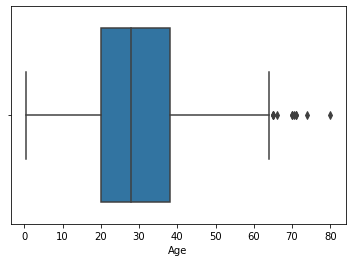

In [149]:
sns.boxplot(x="Age",data=df)

In [151]:
def impute_nan(df,var,median,extreme):
    df[var+"_end"]=df[var].fillna(extreme)
    df[var]=df[var].fillna(median)

In [152]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [153]:
df

,Survived,Age,Fare,Age_NAN,Age_end
0,0,22.0,7.2500,0,22.00000
1,1,38.0,71.2833,0,38.00000
2,1,26.0,7.9250,0,26.00000
3,1,35.0,53.1000,0,35.00000
4,0,35.0,8.0500,0,35.00000
...,...,...,...,...,...
886,0,27.0,13.0000,0,27.00000
887,1,19.0,30.0000,0,19.00000
888,0,28.0,23.4500,1,73.27861
889,1,26.0,30.0000,0,26.00000


<AxesSubplot:>

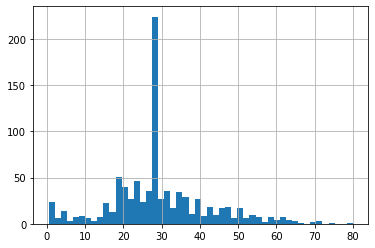

In [155]:
df["Age"].hist(bins=50)

<AxesSubplot:>

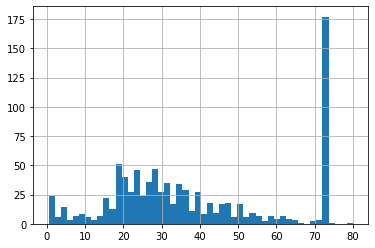

In [156]:
df["Age_end"].hist(bins=50)

<AxesSubplot:xlabel='Age_end'>

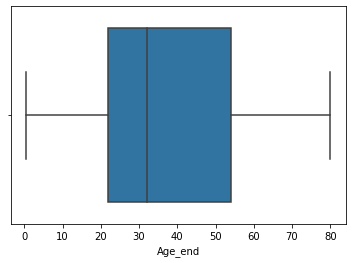

In [158]:
sns.boxplot(x="Age_end",data=df)